Natural images classification since why not

https://www.kaggle.com/datasets/prasunroy/natural-images/code?datasetId=42780&sortBy=voteCount

In [1]:
import pandas as pd
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import stats
from keras.utils import to_categorical
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer # tri druhy skalovani
import os

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
labels = os.listdir('natural_images/')
print(labels)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [4]:
x_data =[]
y_data = []

for label in labels:
    path = 'natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        x_data.append(np.array(image_resized))
        y_data.append(label)

In [5]:
x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)

the shape of X is:  (6899, 32, 32, 3) and that of Y is:  (6899,)


In [6]:
#stadardizing the input data
x_data = x_data.astype('float32')/255

In [7]:
y_encoded = preprocessing.LabelEncoder().fit_transform(y_data)
y_categorical = to_categorical(y_encoded)

In [8]:
r = np.arange(x_data.shape[0])
np.random.seed(420)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)


In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.25))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.5))
model.add(tf.keras.layers.Dense(8, activation='softmax'))

In [11]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [12]:
history = model.fit(X_train, Y_train, epochs=80, validation_split=0.2)

Epoch 1/80
130/130 [==============================] - 8s 43ms/step - loss: 1.1603 - accuracy: 0.5813 - val_loss: 0.6903 - val_accuracy: 0.7623
Epoch 2/80
130/130 [==============================] - 5s 35ms/step - loss: 0.6270 - accuracy: 0.7731 - val_loss: 0.5328 - val_accuracy: 0.7923
Epoch 3/80
130/130 [==============================] - 5s 42ms/step - loss: 0.4616 - accuracy: 0.8338 - val_loss: 0.4119 - val_accuracy: 0.8551
Epoch 4/80
130/130 [==============================] - 7s 54ms/step - loss: 0.3640 - accuracy: 0.8633 - val_loss: 0.5057 - val_accuracy: 0.8116
Epoch 5/80
130/130 [==============================] - 6s 49ms/step - loss: 0.3174 - accuracy: 0.8794 - val_loss: 0.5075 - val_accuracy: 0.8058
Epoch 6/80
130/130 [==============================] - 4s 34ms/step - loss: 0.2872 - accuracy: 0.8869 - val_loss: 0.4291 - val_accuracy: 0.8657
Epoch 7/80
130/130 [==============================] - 7s 53ms/step - loss: 0.2201 - accuracy: 0.9166 - val_loss: 0.4087 - val_accuracy: 0.8802

In [13]:
Y_pred = model.predict(X_test)
Y_test = np.argmax(Y_test,axis=1)

54/54 [==============================] - 1s 10ms/step


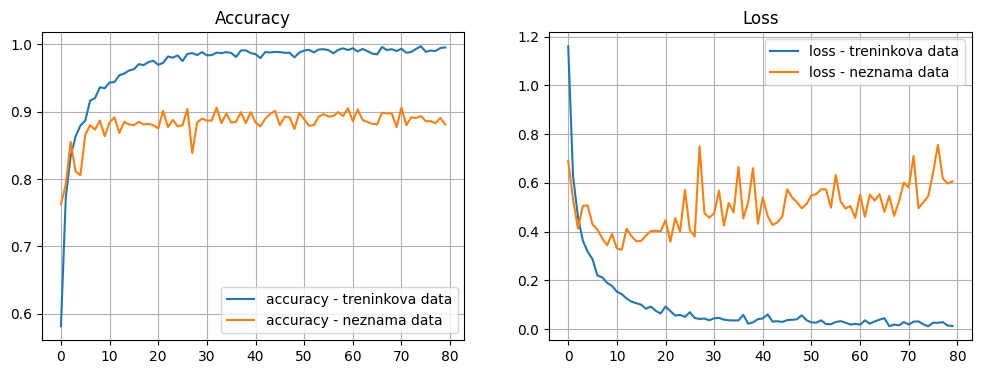

In [15]:
plt.rcParams["figure.figsize"] = [12,4]
figure, axis = plt.subplots(1, 2)
axis[0].plot(history.history['accuracy'], label='accuracy - treninkova data')
axis[0].plot(history.history['val_accuracy'], label='accuracy - neznama data')
axis[0].grid()
axis[0].set_title('Accuracy')
axis[0].legend()

axis[1].plot(history.history['loss'], label='loss - treninkova data')
axis[1].plot(history.history['val_loss'], label='loss - neznama data')
axis[1].grid()
axis[1].set_title('Loss')
axis[1].legend()

#loss, accuracy = model.evaluate(X_test, Y_test)
#print(f"Test Accuracy: {accuracy * 100:.2f}%")

In [19]:
from sklearn.metrics import confusion_matrix # matice 
yhat = model.predict(X_test)
vysl = np.argmax(yhat,axis=1)
cm = confusion_matrix(Y_test, vysl)
print(cm)
print("Ohodnoceni na testovacich datech")

54/54 [==============================] - 0s 7ms/step
[[178   0   4   4   1   0   0   0]
 [  2 225   4   2   5   1   0   0]
 [  1   5 159  46   4   0   1   1]
 [  2   2  32 126   3   2   1   3]
 [  3   4   7   9 177   0   1   0]
 [  0   0   0   0   0 255   0   0]
 [  0   1   0   6   2   0 195   0]
 [  0   0   1   4   0   1   0 245]]
Ohodnoceni na testovacich datech


In [20]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, vysl))


              precision    recall  f1-score   support

           0       0.96      0.95      0.95       187
           1       0.95      0.94      0.95       239
           2       0.77      0.73      0.75       217
           3       0.64      0.74      0.68       171
           4       0.92      0.88      0.90       201
           5       0.98      1.00      0.99       255
           6       0.98      0.96      0.97       204
           7       0.98      0.98      0.98       251

    accuracy                           0.90      1725
   macro avg       0.90      0.90      0.90      1725
weighted avg       0.91      0.90      0.91      1725

